In [100]:
import numpy
import pandas
import tensorflow
import keras
from matplotlib import pyplot
import seaborn
import itertools

%matplotlib inline

In [101]:
# CLASSIFIER PARAMETERS
my_vars = ['petallength', 'petalwidth']
class_col = 'flower'
my_class = 'Iris-virginica'
my_loss = 'mse' # 'mse', 'binary_crossentropy'
my_metrics = ['Accuracy'] # 'Accuracy', 'Precision', 'Recall'
lr = 0.01 # 0.01, 0.001
my_epochs = 3000
validation_split = 0.25 # 0.25, 0.33

# SELECTION FROM IRIS DATAFRAME
my_vars_w_class = my_vars.copy()
my_vars_w_class.append(class_col)

In [102]:
iris = pandas.read_csv('iris.data')
iris = iris[my_vars_w_class]
iris

,petallength,petalwidth,flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


c:\Users\User\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


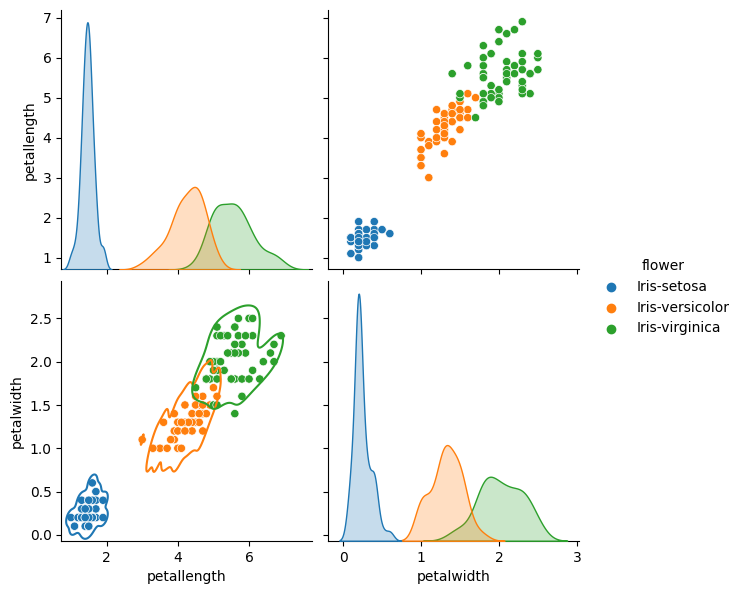

In [103]:
g = seaborn.pairplot(iris, hue='flower', height=3, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

In [104]:
# PREPARING Xn and Yn
X = iris[my_vars].to_numpy()
Y = (iris['flower'] == my_class).astype(int).to_numpy()[:, numpy.newaxis]

In [105]:
# BUILDING THE MODEL WITH THE SEQUENTIAL API
# my_net = keras.Sequential()
inputs = keras.Input(shape=(len(my_vars), ))
outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
model_name = f'{my_class}_classifier'
my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()

Model: "Iris-virginica_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 


 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# TRAINING THE MODEL
optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=lr)
# optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr)
my_net.compile(optimizer=optimizer, loss=my_loss, metrics=my_metrics)
# es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', patience=1000)
history = my_net.fit(X, Y, batch_size=X.shape[0], epochs=my_epochs, validation_split=validation_split, verbose=1) # , callbacks=[es])

Epoch 1/3000
1/1 [==============================] - 1s 623ms/step - loss: 0.1427 - Accuracy: 0.8929 - val_loss: 0.8733 - val_Accuracy: 0.0000e+00
Epoch 2/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1391 - Accuracy: 0.8929 - val_loss: 0.8923 - val_Accuracy: 0.0000e+00
Epoch 3/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1368 - Accuracy: 0.8929 - val_loss: 0.9059 - val_Accuracy: 0.0000e+00
Epoch 4/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1351 - Accuracy: 0.8929 - val_loss: 0.9167 - val_Accuracy: 0.0000e+00
Epoch 5/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1336 - Accuracy: 0.8929 - val_loss: 0.9256 - val_Accuracy: 0.0000e+00
Epoch 6/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1324 - Accuracy: 0.8929 - val_loss: 0.9331 - val_Accuracy: 0.0000e+00
Epoch 7/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1313 - Accuracy: 0.8929 - val_loss: 0.9396 - val_Accur

# PLOT RESULTS

In [107]:
# CLASS COLOR GRID & CLASS EVALUATION
grid_n_points = 100
class_threshold = 0.5
little_delta = 0.1


In [108]:
x0_grid = numpy.linspace(X[:, 0].min(), X[:, 0].max(), grid_n_points)
x1_grid = numpy.linspace(X[:, 1].min(), X[:, 1].max(), grid_n_points)
X_g = numpy.array(list(itertools.product(x0_grid, x1_grid)))
Y_g = my_net.predict(X_g)
Y_est = (my_net.predict(X) > class_threshold).astype(int)
t_error, t_precision = my_net.evaluate(X, Y, verbose=0)

5/5 [==============================] - 0s 4ms/step


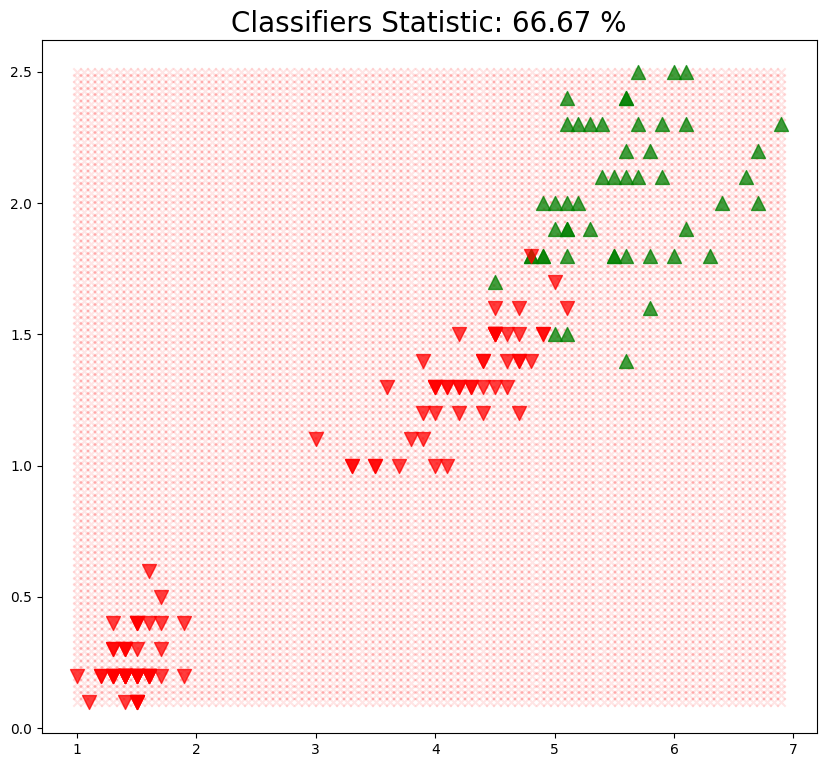

In [109]:
# CLASSIFICATION FIGURE
fig = pyplot.figure(figsize=(10, 9))
ax = fig.add_subplot(111)
# PLOT CLASS REGION
ix_class_region = Y_g.reshape(-1) > class_threshold
ix_class_points = Y.reshape(-1) == 1
ix_surface = (Y_g.reshape(-1) >= class_threshold - little_delta) &  (Y_g.reshape(-1) <= class_threshold + little_delta)
_ = ax.scatter(X_g[ix_class_region, 0], X_g[ix_class_region, 1], marker='o', color='green', alpha=0.1)
_ = ax.scatter(X_g[~ix_class_region, 0], X_g[~ix_class_region, 1], marker='x', color='red', alpha=0.1)
_ = ax.scatter(X_g[ix_surface, 0], X_g[ix_surface, 1], marker='*', color='blue', alpha=0.5)
_ = ax.scatter(X[ix_class_points, 0], X[ix_class_points, 1], marker='^', color='green', alpha=0.75, s=100)
_ = ax.scatter(X[~ix_class_points, 0], X[~ix_class_points, 1], marker='v', color='red', alpha=0.75, s=100)
_ = ax.set_title('Classifiers {}: {:.2f} %'.format('Statistic', 100*t_precision), size=20)

In [110]:
numpy.unique(Y_g)

array([9.7510403e-12, 9.9725167e-12, 1.0199024e-11, ..., 4.9714525e-03,
       5.0837956e-03, 5.1986668e-03], dtype=float32)